In [121]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
import os

In [122]:
ruta_entrada= os.path.join( '.','data')
ruta_salida = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'IDEAM'
ruta_serie= os.path.join(ruta_entrada,ciudad,fuente+'.csv')
serie= pd.read_csv(ruta_serie, sep = ';',
                encoding='latin-1')

In [183]:
def GHI_promedio(serie_horaria):  #Cálculo ENFICC 99%
    agnos=sorted(serie_horaria['AÑO'].unique())
    ghi_df=pd.DataFrame(columns=["AÑO","MES","DIAS","GHImes"])
    energia = list(serie_horaria)[-1]
    for agno in agnos:
        for mes in range(1,13):
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
        break
        
    agnos2=sorted(ghi_df['AÑO'].unique())
    df_dias=pd.DataFrame(columns=["AÑO","MES","GHIdia"])
    for agno in agnos2:
        for mes in range(1,13):
            dia=ghi_df.loc[((ghi_df['AÑO']==agno) &
                                   (ghi_df['MES']==mes)),'DIAS'].item()
            ghi_diario=ghi_df.loc[((ghi_df['AÑO']==agno) & 
                                          (ghi_df['MES']==mes)),'GHImes'].item()/dia
            ghi_dict = {'AÑO':agno,'MES':mes,'GHIdia':ghi_diario}
            df_dias=df_dias.append(ghi_dict,ignore_index=True)
        break
    ENFICC=ghidia.quantile(0.01,numeric_only=True)['GHIdia']
        
    return print('La ENFICC 99% es', ENFICC)

In [184]:
GHI_promedio(serie)

La ENFICC 99% es 4.56900737661


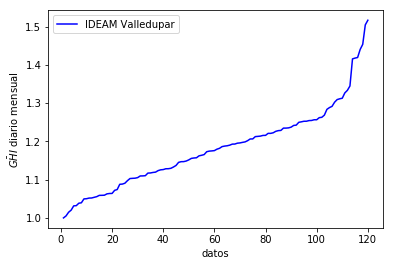

In [171]:
t=np.linspace(1,120,120)
plt.plot(t,datosIDEAM/datosIDEAM[0],'b',label='IDEAM Valledupar')
plt.legend()
plt.ylabel('$\\bar{GHI}$ diario mensual')
plt.xlabel('datos')
plt.show()

## POR QUÈ DIVIDE LOS DATOS SOBRE EL PRIMERO?

In [172]:
type(fuente)

str